In [1]:
# %load /Users/Jonathan/.je.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
from os.path import join, isfile
# -------------------------------------------------------------------------------------
from nilearn import plotting, image;
from nilearn.masking import compute_epi_mask
import nibabel as nib
from nilearn.input_data import NiftiMasker
import time
# -------------------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
# -------------------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = 12,6

/home/jerez/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/jerez/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# SUBJECTS = ['S08']
SUBJECTS = ['S01','S02','S03','S04','S05','S06','S07','S08','S09','S10','S11','S12']
RUNS = range(1,7)
PATH = '/imaging/ourlab/jerez/memcon/'
PERCENTILE = 5
CV = 5

In [3]:
from helper_functions import apply_niftiMasker, load_scanning_session_matrix, get_onsets
from classification import compute_classification

In [4]:
from nilearn.image import new_img_like
import nibabel as nib
from nilearn import image
from nilearn.plotting import plot_stat_map, show
from sklearn.externals import joblib

### Plot "within subjects" analysis

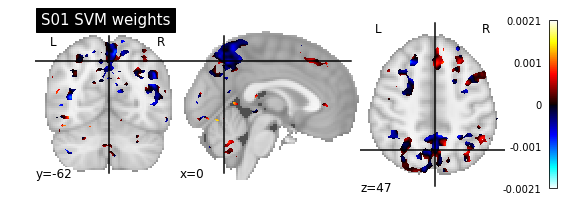

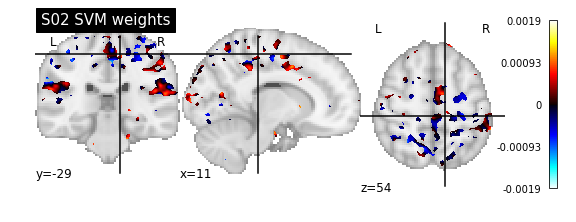

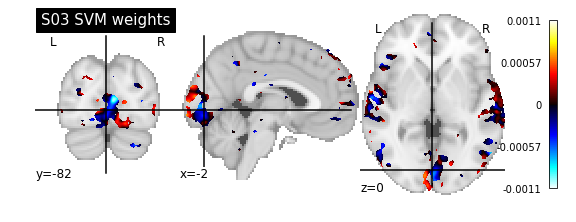

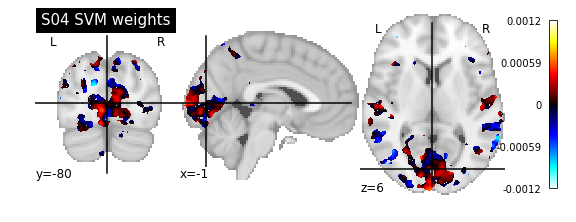

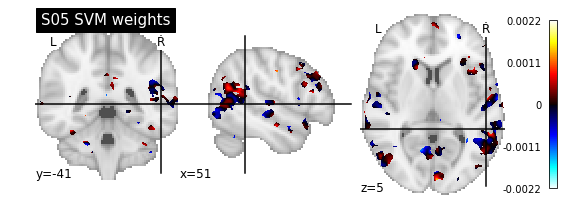

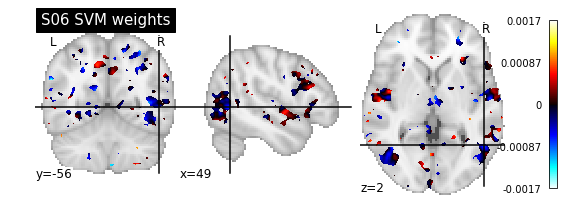

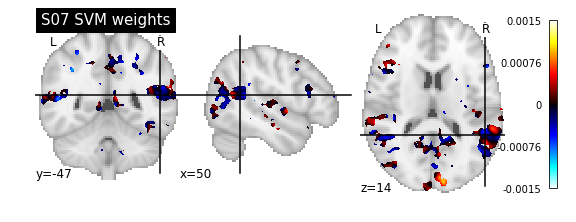

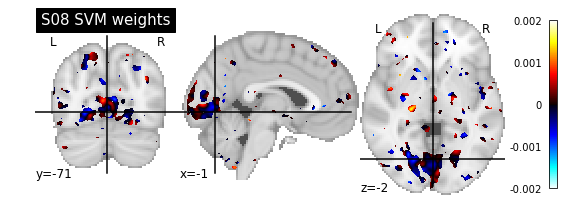

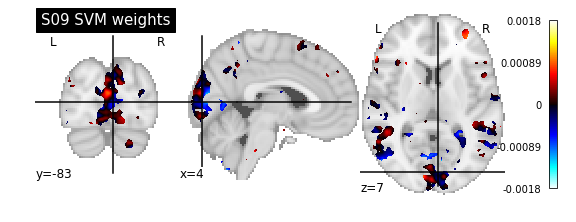

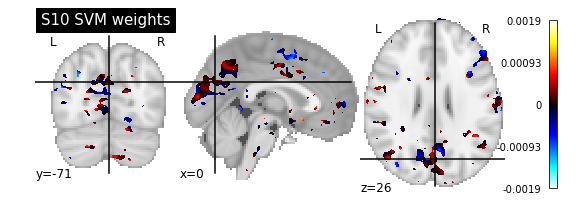

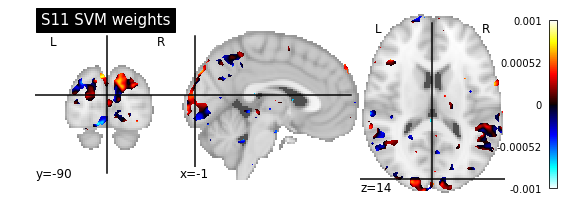

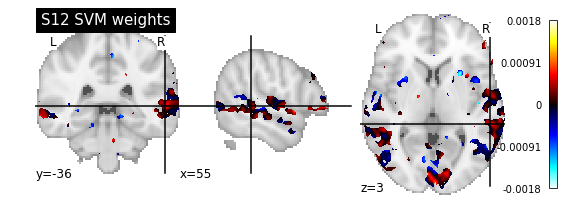

In [5]:
mask = '12_subject_mask.nii'
masker = NiftiMasker(mask_img = mask, standardize=True, memory="nilearn_cache", memory_level=1)
masker.fit_transform(mask)

weight_imgs = []
for subject in SUBJECTS:
    pkl_filename = '../models/analysis_of_12_subjects/within/' +subject +'_within_featSelec_GM.pkl'
    clf = joblib.load(pkl_filename)
    coef = clf.steps[1][1].coef_
    
    coef = clf.steps[0][1].inverse_transform(coef)
    weight_img = masker.inverse_transform(coef)
    data = weight_img.get_data()
    data.shape

    # just 'own' 'classifier 
    weight_img = data[...,2]
    weight_imgs.append(weight_img)
    plot_stat_map(new_img_like(mask,weight_img), title=subject +' SVM weights')
    show()

In [6]:
clf.classes_

array(['bookstore', 'other', 'own'], dtype=object)

In [7]:
# for img in weight_imgs:
#     print img.mean() * 1000000

In [8]:
157*189*156

4628988

In [9]:
a = np.array([1,3,0,0,2,0,9])

In [10]:
a

array([1, 3, 0, 0, 2, 0, 9])

In [11]:
(a!=0)*1

array([1, 1, 0, 0, 1, 0, 1])

In [18]:
weight_imgs[0].shape

(157, 189, 156)

In [19]:
(weight_imgs[0] != 0).sum()

82270

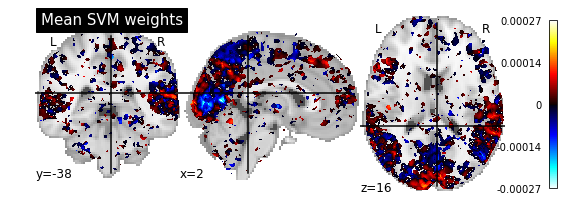

In [20]:
mean_weight_img = np.mean(weight_imgs,axis=0)
plot_stat_map(new_img_like(mask,mean_weight_img), title = 'Mean SVM weights')

In [21]:
# convert feature weights to binary
for i,img in enumerate(weight_imgs):
    weight_imgs[i] = (weight_imgs[i] != 0)*1

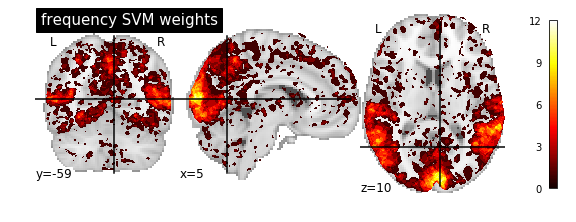

In [22]:
sum_weight_img = np.sum(weight_imgs,axis=0)
plot_stat_map(new_img_like(mask,sum_weight_img), title = 'frequency SVM weights')

In [1]:
# plotting.plot_glass_brain(new_img_like(mask,mean_weight_img), title = 'Mean SVM weights',colorbar=True,vmin=-0.01,vmax=0.01)

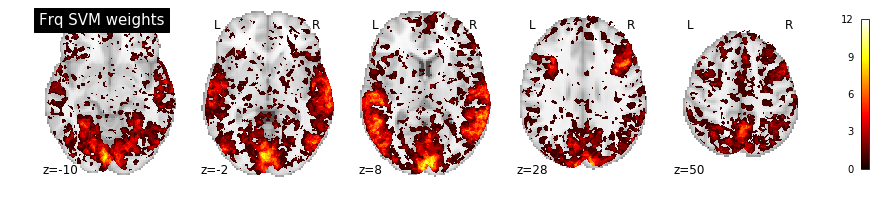

In [25]:
cut_coords = [-10,-2,8,28,50]
plotting.plot_stat_map(new_img_like(mask,sum_weight_img), title = 'Frq SVM weights', display_mode='z',cut_coords=cut_coords)#,vmax=0.01)

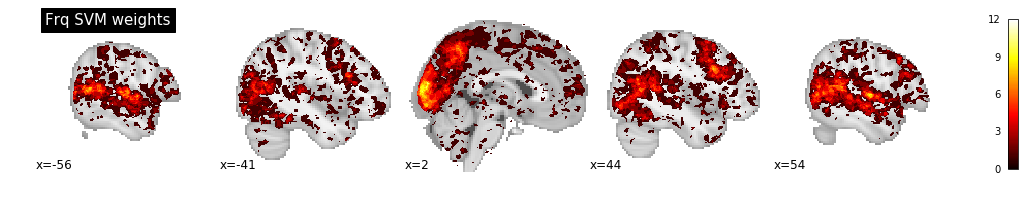

In [27]:
cut_coords = [-56,-41,2,44,54]
plotting.plot_stat_map(new_img_like(mask,sum_weight_img), title = 'Frq SVM weights', display_mode='x',cut_coords=cut_coords)#,vmax=0.01)

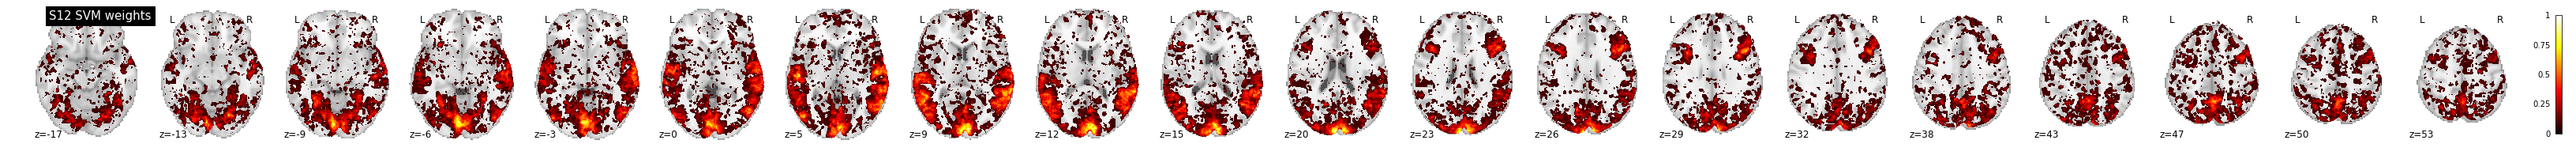

In [18]:
mean_weight_img = np.mean(weight_imgs,axis=0)
plot_stat_map(new_img_like(mask,mean_weight_img), title=subject +' SVM weights',display_mode='z',cut_coords=20)

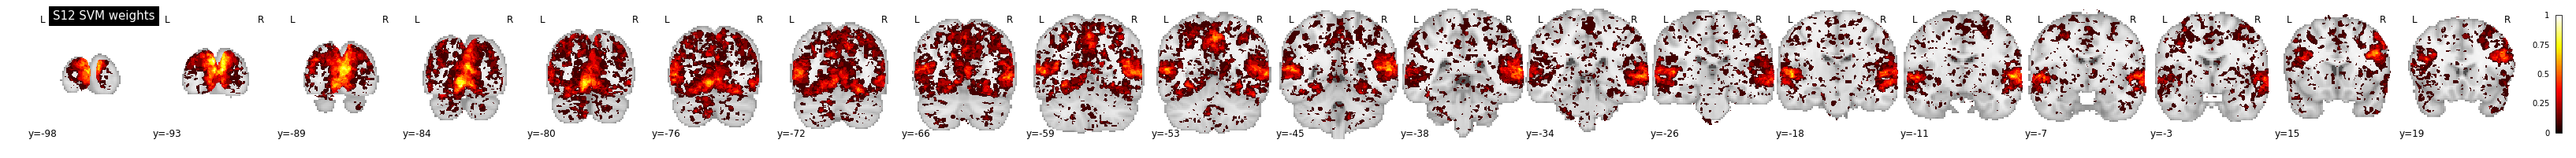

In [19]:
mean_weight_img = np.mean(weight_imgs,axis=0)
plot_stat_map(new_img_like(mask,mean_weight_img), title=subject +' SVM weights',display_mode='y',cut_coords=20)

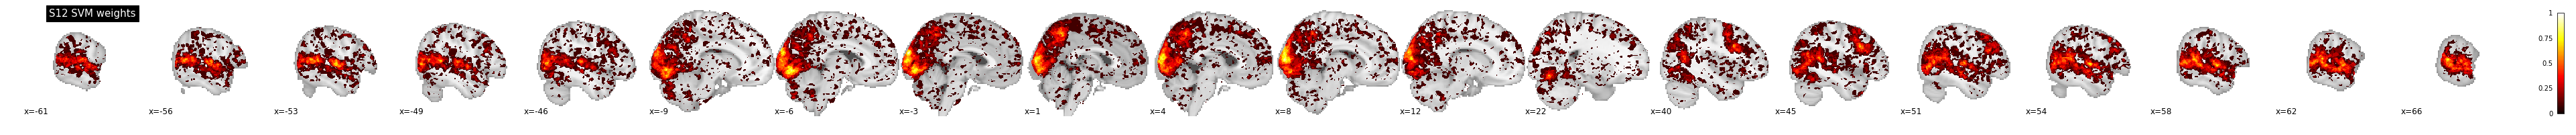

In [20]:
mean_weight_img = np.mean(weight_imgs,axis=0)
plot_stat_map(new_img_like(mask,mean_weight_img), title=subject +' SVM weights',display_mode='x',cut_coords=20)